<a href="https://colab.research.google.com/github/Jnyambok/Python-Utility-Functions/blob/main/Python_Utility_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Utility Functions, Algorithms and Data Structures**
This notebook serves as a playground for playing with python utility functions.
Adapted from various sources such as :

1.   [How to Define Python Utility Functions](https://labex.io/tutorials/python-how-to-define-python-utility-functions-419853)
2.    [Problem Solving with Algorithms and Data Structures using Python](https://runestone.academy/ns/books/published/pythonds/index.html)

The best practices for functions are:


1.  Keep functions focused on a single task
2.  Use clear and descriptive names
3.  Use type hints and docstrings
4.  Handle potential edge cases
5.  Prefer pure functions when possible

Effective utility functions should have:

1.   A single, well-defined responsibility
2.   Clear input and output expectations.
3.    Minimal side effects



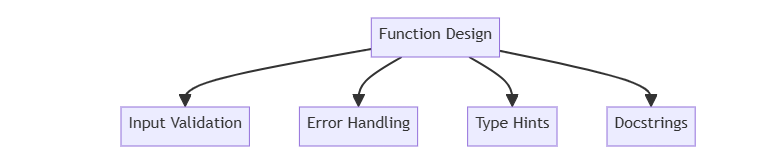

# **1. Docstrings**

**Docstrings** short for documentation strings provide a convenient way of associating documentation with Python Modules, functions, classes and methods.
They are declared using triple quotes and can be accessed using the __doc__ method of an object or using the help function.

In [6]:
def addition():
  """
  Demonstrates the triple double quotes docstrings and does nothing really

  """

  return None

print(addition.__doc__)
help(addition)

Help on function addition in module __main__:

addition()
    Demonstrates the triple double quotes docstrings and does nothing really



Google Style docstrings follow a specific format and provide a structured way to document Python Code including parameters, return values and descriptions

In [8]:

def multiply_numbers(a,b):

  """
  Multiplies two numbers and returns the result

  Args:
  a (int) : The first number
  b (int) : The second number

  Returns:
  int : The product of the two numbers
  """

  return a*b


print(multiply_numbers(3,5))
help(multiply_numbers)


15
Help on function multiply_numbers in module __main__:

multiply_numbers(a, b)
    Multiplies two numbers and returns the result
    
    Args:
    a (int) : The first number
    b (int) : The second number
    
    Returns:
    int : The product of the two numbers

